In [ ]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tarfile

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

I decided to use the Iris dataset as the dataset I originally chose was not suitable for clustering.

In [ ]:
df = pd.read_csv(r"IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# K-Means

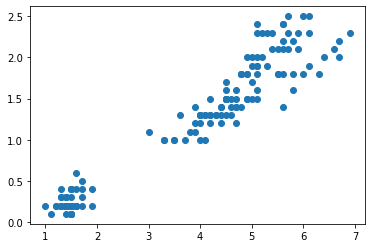

In [ ]:
plt.scatter(df.petal_length, df.petal_width)

Assuming we don't know the number of clusters optimal for this dataset, we use the elbow technique to find the best k-value through the squared sum of error found with a range of k-values.

In [ ]:
k_range = range(1,10)
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit_predict(df[['petal_length','petal_width']])
  sse.append(km.inertia_)
sse

[550.6434666666669,
 86.40394533571003,
 31.38775897435897,
 19.499400899685114,
 13.933308757908755,
 11.073657664362928,
 9.21026673204751,
 7.762348930296762,
 6.472894541406307]

After finding the range we then plot the values out and select the k-value where the graph seems like it is forming an asymptote or "the elbow point".

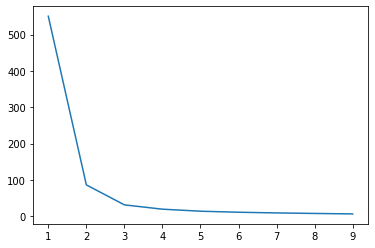

In [ ]:
plt.plot(k_range,sse)

Using this, we have determined that the k-value most optimal is 3. This also falls in line with our knowledge of the dataset.

In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

We run the fit and prediction for the given data and then classify all the points into clusters as shown below.

In [ ]:
y_pred = km.fit_predict(df[['petal_length','petal_width']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df['cluster'] = y_pred
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


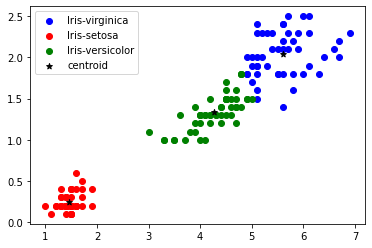

In [ ]:
c0 = df[df['cluster'] == 0]
c1 = df[df['cluster'] == 1]
c2 = df[df['cluster'] == 2]

plt.scatter(c0.petal_length, c0.petal_width, color='blue', label='Iris-virginica')
plt.scatter(c1.petal_length, c1.petal_width, color='red', label='Iris-setosa')
plt.scatter(c2.petal_length, c2.petal_width, color='green', label='Iris-versicolor')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')

plt.legend()

Plotting the graph again, this time with the different clusters coloured, shows how the clustering has been carried out. This is an accurate representation of the flowers' grouping in reality. The stars in the center of each cluster are the centroids of the given cluster. The centroids are listed below.

In [ ]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

Some notes on K-Means clustering include the lack of the ability to deal with overlapping clusters and is more suited to dealing with globular groups than other kinds. In this particular dataset we find that it works well enough however it will not always be so.

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from pandas import DataFrame

In [ ]:
clustering = DBSCAN(eps=1, min_samples=2).fit(df[['petal_length','petal_width']])
cluster = clustering.labels_
len(set(cluster))

2

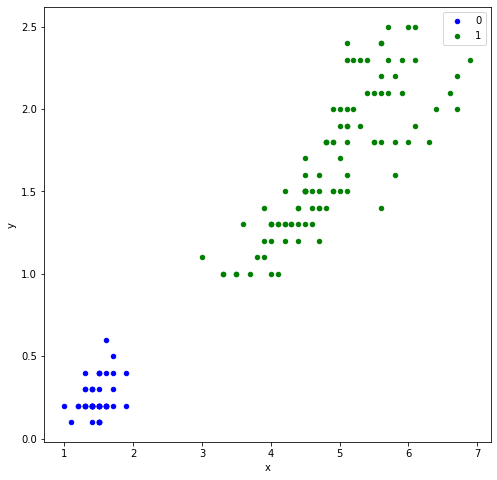

In [ ]:
ndf = df[['petal_length', 'petal_width']]
dbdf = DataFrame(dict(x=df['petal_length'], y=df['petal_width'], label=cluster))
colors = {-1:'red', 0:'blue', 1:'green'}
fig, ax = plt.subplots(figsize=(8,8))
grouped = dbdf.groupby('label')
for key, group in grouped:
  group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.show()

It looks like this particular clustering method does not suit this dataset as we know there are supposed to be three clusters however we can not set that in density-based spacial clustering applications with noise. We also do not see any noise points.

We could try to change the epsilon and min_samples values to get better results however increasing the epsilon value can only reduce the number of clusters and increasing the number of min samples has a similar effect or might push all the points to be noise points.

Regardless, I have tested some values below.

### Epsilon

In [ ]:
clustering = DBSCAN(eps=2, min_samples=2).fit(df[['petal_length','petal_width']])
cluster = clustering.labels_
len(set(cluster))

1

In [ ]:
clustering = DBSCAN(eps=3, min_samples=2).fit(df[['petal_length','petal_width']])
cluster = clustering.labels_
len(set(cluster))

1

In [ ]:
clustering = DBSCAN(eps=9, min_samples=2).fit(df[['petal_length','petal_width']])
cluster = clustering.labels_
len(set(cluster))

1

### Min_Samples

In [ ]:
clustering = DBSCAN(eps=1, min_samples=1).fit(df[['petal_length','petal_width']])
cluster = clustering.labels_
len(set(cluster))

2

In [ ]:
clustering = DBSCAN(eps=1, min_samples=5).fit(df[['petal_length','petal_width']])
cluster = clustering.labels_
len(set(cluster))

2

In [ ]:
clustering = DBSCAN(eps=1, min_samples=20).fit(df[['petal_length','petal_width']])
cluster = clustering.labels_
len(set(cluster))

2

Unfortunately finding the right parameters in this particular clustering algorithm might not be possible with my current skillset and knowledge.

Some notes about the DBSCAN method include that it works well with arbitrary shapes and so does not have any particular shape it works better with. It also does not require the number of clusters to be known, however in cases (such as this) where we do know how many clusters should exist this may not be ideal.

A drawback related to finding the right number of clusters is setting the right variable values. Epsilon and min_samples require domain konwledge to correctly find, though they could be identified through testing sometimes. Other times, such as this, knowing the number of clusters but not the epsilon value could indicate this method is not the right one to use.

# Gaussian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df[['petal_length','petal_width']])

GaussianMixture(n_components=3)

In [ ]:
labels = gmm.predict(df[['petal_length','petal_width']])
df['cluster'] = labels
print(df)

     sepal_length  sepal_width  ...         species  cluster
0             5.1          3.5  ...     Iris-setosa        1
1             4.9          3.0  ...     Iris-setosa        1
2             4.7          3.2  ...     Iris-setosa        1
3             4.6          3.1  ...     Iris-setosa        1
4             5.0          3.6  ...     Iris-setosa        1
..            ...          ...  ...             ...      ...
145           6.7          3.0  ...  Iris-virginica        0
146           6.3          2.5  ...  Iris-virginica        0
147           6.5          3.0  ...  Iris-virginica        0
148           6.2          3.4  ...  Iris-virginica        0
149           5.9          3.0  ...  Iris-virginica        0

[150 rows x 6 columns]


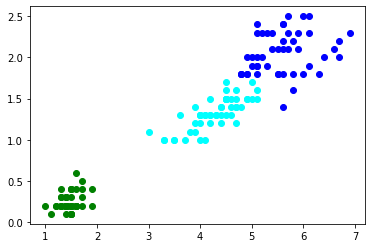

In [ ]:
color=['blue','green','cyan', 'black']
for k in range(0,3):
    data = df[df["cluster"]==k]
    plt.scatter(data.petal_length,data.petal_width,c=color[k])
plt.show()

One note about Gaussian Mixture Models is that they tend to present themselves in eliptical clusters. Though this did not become much of an issue for this particular dataset, there are many situations they would not fit.

On the positive side, Gaussian modeling uses probabilities and does not entirely work off of grouping, instead using "probabalistic grouping". This is useful when datapoints could possibly be in two or more clusters and so on.

# Decision Trees

In [ ]:
from sklearn.tree import   DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()

In [ ]:
x = df[["petal_length", "petal_width"]]
y = df[["cluster"]]
print("X: ",x)
print("Y: ",y)

X:       petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns]
Y:       cluster
0          1
1          1
2          1
3          1
4          1
..       ...
145        0
146        0
147        0
148        0
149        0

[150 rows x 1 columns]


In [ ]:
classifier = DecisionTreeClassifier(max_depth=2, random_state=42)
classifier.fit(x, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

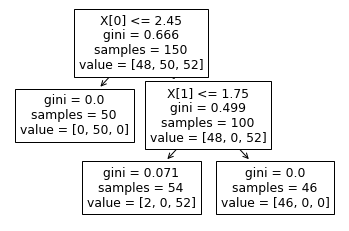

In [ ]:
plot_tree(classifier);

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


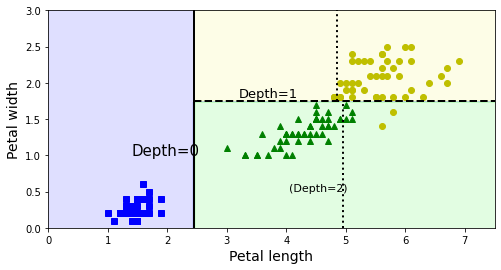

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, x, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
   
    x1, x2 = np.meshgrid(x1s, x2s)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        p0 = df[df['cluster'] == 0]
        p1 = df[df['cluster'] == 1]
        p2 = df[df['cluster'] == 2]

        plt.plot(p0.petal_length, p0.petal_width, "yo", label='Iris-virginica')
        plt.plot(p1.petal_length, p1.petal_width, "bs", label='Iris-setosa')
        plt.plot(p2.petal_length, p2.petal_width, "g^", label='Iris-versicolor')

        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(classifier, x, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## Perfomance Measures

### Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier, x, y, cv=10, scoring="accuracy")

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

### Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(classifier, x, y, cv=10)
confusion_matrix(y, y_pred)

array([[46,  0,  2],
       [ 0, 50,  0],
       [ 0,  0, 52]])

In [ ]:
y_perfect_predictions = y  # pretend we reached perfection
confusion_matrix(y, y_perfect_predictions)

array([[48,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 52]])

### Precision

In [ ]:
from sklearn.metrics import precision_score

precision_score(y, y_pred, average="macro")

0.9876543209876543

### Recall

In [ ]:
from sklearn.metrics import recall_score

recall_score(y, y_pred, average="macro")

0.9861111111111112

### F1 Score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y, y_pred, average="macro")

0.9866184932423391

## Training and Testing

### Building

In [ ]:
# Splitting the dataset

#Train-Test Set 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=42, stratify=y)

#Train-Test Set 2 (+30%)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=8/25, random_state=42, stratify=y)

#Train-Test Set 3 (+60%)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=39/100, random_state=42, stratify=y)

NameError: ignored

In [ ]:
#training_classifier = DecisionTreeClassifier(max_depth=2, random_state=42)
training_classifier.fit(x_train, y_train)

In [ ]:
plot_tree(training_classifier);

### Plotting

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


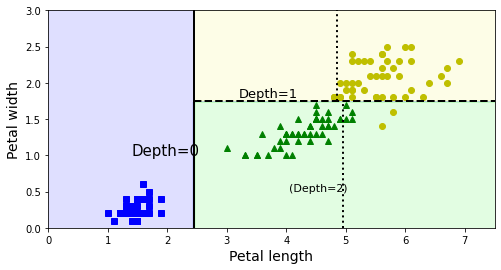

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, x, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
   
    x1, x2 = np.meshgrid(x1s, x2s)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        p0 = df[df['cluster'] == 0]
        p1 = df[df['cluster'] == 1]
        p2 = df[df['cluster'] == 2]

        plt.plot(p0.petal_length, p0.petal_width, "yo", label='Iris-virginica')
        plt.plot(p1.petal_length, p1.petal_width, "bs", label='Iris-setosa')
        plt.plot(p2.petal_length, p2.petal_width, "g^", label='Iris-versicolor')

        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(training_classifier, x_test, y_test)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

### Performance Measures

In [ ]:
# Creating predicitons
y_pred = training_classifier.predict(x_test)
y_train_pred = training_classifier.predict(x_train)

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
print("Train: ")
print(accuracy_score(y_train, y_train_pred))
print("Test: ")
print(accuracy_score(y_test, y_pred))

Train: 
0.99
Test: 
0.98


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print("Train: ")
print(confusion_matrix(y_train, y_train_pred))
print("Test: ")
print(confusion_matrix(y_test, y_pred))

Train: 
[[31  0  1]
 [ 0 33  0]
 [ 0  0 35]]
Test: 
[[15  0  1]
 [ 0 17  0]
 [ 0  0 17]]


In [ ]:
# Precision
from sklearn.metrics import precision_score

print("Train: ")
print(precision_score(y_train, y_train_pred, average="macro"))
print("Test: ")
print(precision_score(y_test, y_pred, average="macro"))

Train: 
0.9907407407407408
Test: 
0.9814814814814815


In [ ]:
# Recall
from sklearn.metrics import recall_score

print("Train: ")
print(recall_score(y_train, y_train_pred, average="macro"))
print("Test:")
print(recall_score(y_test, y_pred, average="macro"))

Train: 
0.9895833333333334
Test:
0.9791666666666666


In [ ]:
# F1 Score
from sklearn.metrics import f1_score

print("Train: ")
print(f1_score(y_train, y_train_pred, average="macro"))
print("Test: ")
print(f1_score(y_test, y_pred, average="macro"))

Train: 
0.9900141590282435
Test: 
0.9797235023041475


In [ ]:
# imports
from __future__ import print_function
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from tqdm import trange
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# from keras.datasets import fashion_mnist as fashion_mnist

# Kuzushiji-MNIST Dataset

In [ ]:
# Setting Data Dimensions
img_h = img_w = 28             # Kuzushiji-MNIST images are 28x28
img_size_flat = img_h * img_w  # 28x28=784, the total number of pixels
n_classes = 10                 # Number of classes, one class per digit

In [ ]:
# Loading data
x_train = np.load("kmnist-train-imgs.npz")['arr_0']
y_train = np.load("kmnist-train-labels.npz")['arr_0']
x_test = np.load("kmnist-test-imgs.npz")['arr_0']
y_test = np.load("kmnist-test-labels.npz")['arr_0']

Exception ignored in: <function NpzFile.__del__ at 0x7fcbca943710>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py", line 223, in __del__
    self.close()
  File "/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py", line 214, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'


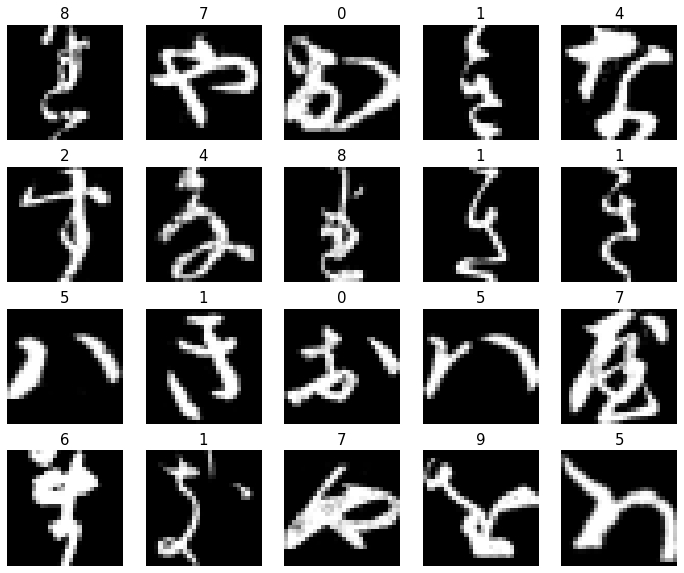

In [ ]:
# Visualise Data Samples
fig, axes = plt.subplots(4,5, figsize=(12, 10))
axes = axes.reshape(-1)

for i in range(20):
    axes[i].axis('off') # hide the axes ticks
    axes[i].imshow(x_train[i,:,:], cmap = 'gray')
    axes[i].set_title(str(y_train[i]), color= 'black', fontsize=15)
plt.show()

In [ ]:
# Flatten images
X_train = np.reshape(x_train, (-1, 784))
X_test = np.reshape(x_test, (-1, 784))
print("X_TRAIN: ", X_train.shape)
print("X_TEST: ", X_test.shape)

X_TRAIN:  (60000, 784)
X_TEST:  (10000, 784)


In [ ]:
from sklearn.linear_model import LogisticRegression
kmnist_clf = LogisticRegression(solver='lbfgs', tol= 1e-5, max_iter = 100, multi_class='multinomial')
kmnist_clf.fit(X_train, y_train)
kmnist_clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6911

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(kmnist_clf, X_train, y_train, cv=10, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.8085    , 0.81983333, 0.81033333, 0.8125    , 0.81383333,
       0.80383333, 0.818     , 0.8165    , 0.81033333, 0.80433333])

In [ ]:
print("X_train: ", X_train)
print("Y_train: ", y_train)

X_train:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Y_train:  [8 7 0 ... 0 4 9]


In [ ]:
# Initial Setup

np.random.seed(42)

X_train, X_val = X_train[:-1000], X_train[-1000:]
y_train, y_val = y_train[:-1000], y_train[-1000:]

In [ ]:
# Action Functions

def forward(network, X):
    # Compute activations of all network layers by applying them sequentially.
    # Return a list of activations for each layer.

    activations = []
    input = X
    # Looping through each layer
    for l in network:
        activations.append(l.forward(input))
        # Updating input to last layer output
        input = activations[-1]

    assert len(activations) == len(network)
    return activations


def predict(network, X):
    # Compute network predictions. Returning indices of largest Logit probability
    logits = forward(network, X)[-1]
    return logits.argmax(axis=-1)


def train(network, X, y):
    # Train our network on a given batch of X and y.
    # We first need to run forward to get all layer activations.
    # Then we can run layer.backward going from last to first layer.
    # After we have called backward for all layers, all Dense layers have already made one gradient step.

    # Get the layer activations
    layer_activations = forward(network, X)
    layer_inputs = [X] + layer_activations  # layer_input[i] is an input for network[i]
    logits = layer_activations[-1]

    # Compute the loss and the initial gradient
    if l_func == 1:
        loss = softmax_crossentropy_with_logits(logits, y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits, y)
    elif l_func == 2:
        loss = loss_mean_squared(logits, y)
        loss_grad = grad_loss_mean_squared(logits, y)

    # Propagate gradients through the network
    # Reverse propogation as this is backprop
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]

        loss_grad = layer.backward(layer_inputs[layer_index], loss_grad)

    return np.mean(loss)

def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [ ]:
# Loss Functions
def softmax_crossentropy_with_logits(logits, reference_answers):
    # Compute crossentropy from logits[batch,n_classes] and ids of correct answers
    logits_for_answers = logits[np.arange(len(logits)), reference_answers]

    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits), axis=-1))

    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    # Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)), reference_answers] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1, keepdims=True)

    return (- ones_for_answers + softmax) / logits.shape[0]

def loss_mean_squared(logits, reference_answers):
    # Compute mean-squared loss from logits[batch,n_classes] and ids of correct answers
    logits_for_answers = logits[np.arange(len(logits)), reference_answers]

    return 0.5*(logits.shape[0]-logits_for_answers)**2

def grad_loss_mean_squared(logits, reference_answers):
    # Compute mean-squared loss gradient from logits[batch,n_classes] and ids of correct answers
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)), reference_answers] = 1

    return -1*(logits.shape[0]-ones_for_answers)

In [ ]:
# Classes/ Activation Functions
class Layer:
    def __init__(self):
        pass

    def forward(self, input):
        return input

    def backward(self, input, grad_output):
        num_units = input.shape[1]
        d_layer_d_input = np.eye(num_units)
        return np.dot(grad_output, d_layer_d_input)


class ReLU(Layer):
    def __init__(self):
        pass

    def forward(self, input):
        relu_forward = np.maximum(0, input)
        return relu_forward

    def backward(self, input, grad_output):
        relu_grad = input > 0
        return grad_output * relu_grad

class Logistic(Layer):
    def __init__(self):
        pass

    def forward(self, input):
        log_forward = 1.0/(1 + np.exp(-input))
        return log_forward

    def backward(self, input, grad_output):
        log_grad = self.forward(input) * (1 - self.forward(input))
        return grad_output * log_grad

class HyperbolicTan(Layer):
    def __init__(self):
        pass

    def forward(self, input):
        hyper_forward = np.tanh(input)
        return hyper_forward

    def backward(self, input, grad_output):
        hyper_grad = 1-(self.forward(input))**2
        return grad_output * hyper_grad

In [ ]:
#Default variables
h_layers = 2
h_neurons = [5, 10]
a_func = 2
l_rate = 0.1
e = 9
l_func = 1
Afunc = ReLU()
network = []

In [ ]:
# Dense Class
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=l_rate):
        # A layer which performs a transformation:
        # f(x) = <W*x> + b

        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0,
                                        scale=np.sqrt(2 / (input_units + output_units)),
                                        size=(input_units, output_units))
        self.biases = np.zeros(output_units)

    def forward(self, input):
        # Perform a transformation:
        # f(x) = <W*x> + b

        # input shape: [batch, input_units]
        # output shape: [batch, output units]
        return np.dot(input, self.weights) + self.biases

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0) * input.shape[0]

        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step.
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases

        return grad_input

In [ ]:
# Initialisation Function
def init():
    #Use Global variables
    global h_layers
    global h_neurons
    global a_func
    global Afunc
    global l_rate
    global l_func
    global e

    # Input variables
    print("*** Artificial Neural Network Paramters ***")
    h_layers = int(input("Choose the number of hidden layers: "))
    print("Choose the number of hidden neurons in each hidden layer, the optimal value found is 5: ")
    h_neurons = []
    i = 1
    while (i != h_layers+1):
        print("Input number of neurons for layer ", i)
        neurons = int(input(">>> "))
        h_neurons.append(neurons)
        i += 1
    a_func = int(input("Choose the activation function;\n1 - logistic\n2 - relu\n3 - hyperbolictan\n\n... "))
    if a_func == 1:
        Afunc = Logistic()
    elif a_func == 2:
        Afunc = ReLU()
    elif a_func == 3:
        Afunc = HyperbolicTan()
    else:
        print("The entered value is out of bounds, the program will terminate.")
        sys.exit()
    l_rate = float(input("Choose the learning rate, the optimal value found is 0.1: "))
    e = int(input("Choose the number of epochs, the optimal value found is 9: "))
    l_func = int(input("Choose the type of loss function;\n1 - cross_entropy\n2 - loss_mean_squared\n\n... "))
    if l_func != 1 and l_func != 2:
        print("The entered value is out of bounds, the program will terminate.")
        sys.exit()

In [ ]:
# Running ANN
def runANN():
    # Initialising the network
    global network
    network.append(Dense(X_train.shape[1], h_neurons[0]))

    # Adding layers to the network
    i = 0
    if i < h_layers:
        if i == 0:
            network.append(Afunc)
            network.append(Dense(h_neurons[i], h_neurons[i + 1]))
        elif i == h_layers:
            network.append(Afunc)
            network.append(Dense(h_neurons[i - 1], 1))
        else:
            network.append(Afunc)
            network.append(h_neurons[i - 1], h_neurons[i])
        i += i

    # Running the epochs
    train_log = []
    val_log = []
    for epoch in range(e):
        for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=32, shuffle=True):
            train(network, x_batch, y_batch)

        train_log.append(np.mean(predict(network, X_train) == y_train))
        val_log.append(np.mean(predict(network, X_test) == y_test))

        clear_output()
        print("Epoch", epoch)
        print("Train accuracy:", train_log[-1])
        print("Val accuracy:", val_log[-1])
        plt.plot(train_log, label='train accuracy')
        plt.plot(val_log, label='test accuracy')
        plt.legend(loc='best')
        plt.grid()
        plt.show()

init()
runANN()

*** Artificial Neural Network Paramters ***
Choose the number of hidden layers: 5
Choose the number of hidden neurons in each hidden layer, the optimal value found is 5: 
Input number of neurons for layer  1
>>> 5
Input number of neurons for layer  2
>>> 10
Input number of neurons for layer  3
>>> 15
Input number of neurons for layer  4
>>> 20
Input number of neurons for layer  5
>>> 25
Choose the activation function;
1 - logistic
2 - relu
3 - hyperbolictan

... 1
Choose the learning rate, the optimal value found is 0.1: 0.1
Choose the number of epochs, the optimal value found is 9: 2
Choose the type of loss function;
1 - cross_entropy
2 - loss_mean_squared

... 1


  0%|          | 0/1843 [00:00<?, ?it/s]


ValueError: ignored

# MNIST Comparision

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
X_train = np.reshape(x_train, (-1, 784))
X_test = np.reshape(x_test, (-1, 784))

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from sklearn.linear_model import LogisticRegression
kmnist_clf = LogisticRegression(solver='lbfgs', tol= 1e-5, max_iter = 100, multi_class='multinomial')
kmnist_clf.fit(X_train, y_train)
kmnist_clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9255

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(kmnist_clf, X_train, y_train, cv=10, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.926     , 0.919     , 0.9085    , 0.92666667, 0.92133333,
       0.917     , 0.90916667, 0.91383333, 0.91516667, 0.939     ])

In [ ]:
# Initial Setup

np.random.seed(42)

X_train, X_val = X_train[:-1000], X_train[-1000:]
y_train, y_val = y_train[:-1000], y_train[-1000:]

In [ ]:
runANN()

*** Artificial Neural Network Paramters ***
Choose the number of hidden layers: 5
Choose the number of hidden neurons in each hidden layer, the optimal value found is 5: 
Input number of neurons for layer  1
>>> 5
Input number of neurons for layer  2
>>> 10
Input number of neurons for layer  3
>>> 15
Input number of neurons for layer  4
>>> 20
Input number of neurons for layer  5
>>> 25
Choose the activation function;
1 - logistic
2 - relu
3 - hyperbolictan

... 1
Choose the learning rate, the optimal value found is 0.1: 0.1
Choose the number of epochs, the optimal value found is 9: 20
Choose the type of loss function;
1 - cross_entropy
2 - loss_mean_squared

... 1


  0%|          | 0/1843 [00:00<?, ?it/s]


ValueError: ignored

# Convolutional Neural Network

In [ ]:
# Loading data
x_train = np.load("kmnist-train-imgs.npz")['arr_0']
y_train = np.load("kmnist-train-labels.npz")['arr_0']
x_test = np.load("kmnist-test-imgs.npz")['arr_0']
y_test = np.load("kmnist-test-labels.npz")['arr_0']

# Flatten images
X_train = np.reshape(x_train, (-1, 784))
X_test = np.reshape(x_test, (-1, 784))

1
1
1


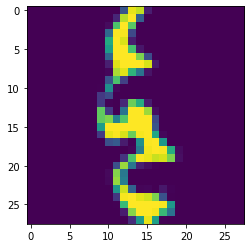

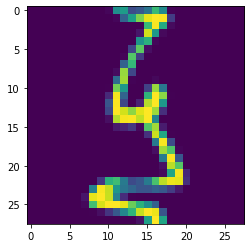

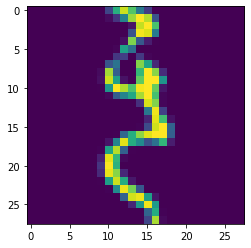

In [ ]:
for i in [3,8,9]:
    plt.figure()
    plt.imshow(x_train[i])
    print(y_train[i])

(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

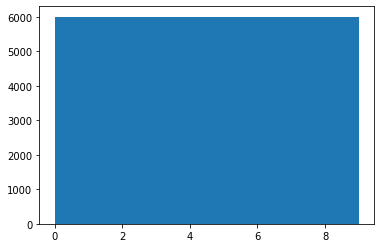

In [ ]:
plt.hist(y_train, bins = 10)

In [ ]:
max_val = []
for i in range(len(x_train)):
    max_val.append(np.max(x_train[i]))
max_val

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 251,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255

In [ ]:
x_train = x_train/255
x_test = x_test/255

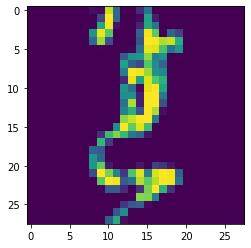

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train = np.reshape(x_train,(60000,28,28,1))

#Add extra dimension for canal, imgs are greyscale so we only need one, if RGB we'd need 3
np.shape(x_train)

(60000, 28, 28, 1)

In [ ]:
nb_classes = 10
targets = y_train.reshape(-1)
y_train = np.eye(nb_classes)[targets]

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 10000, random_state=42)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

# Define the optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 20
batch_size = 86


TypeError: ignored

In [ ]:
model.compile(optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

history = model.fit(x = X_train, y = Y_train,
          epochs = epochs, verbose = 1, 
          callbacks=[learning_rate_reduction])

NameError: ignored

# Task 5

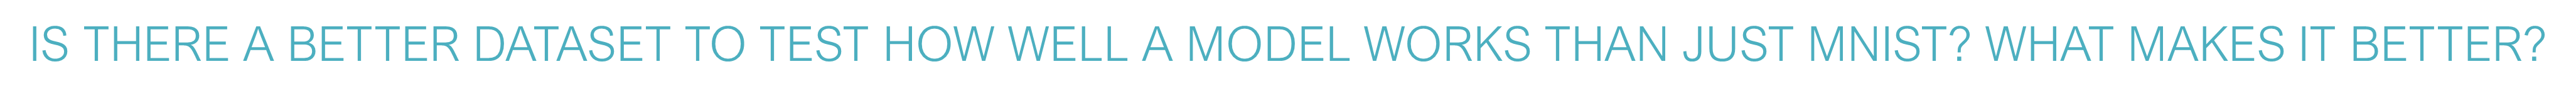

The MNIST dataset is widely used to test models for the first time before running them on untested code, this is to check the reliability of the model through metrics such as accuracy, precision, recall and more. The issue with MNIST is that most models can easily have over 97% accuracy and this may not necessarily indicate that the model used will work as well for other, less explored datasets.

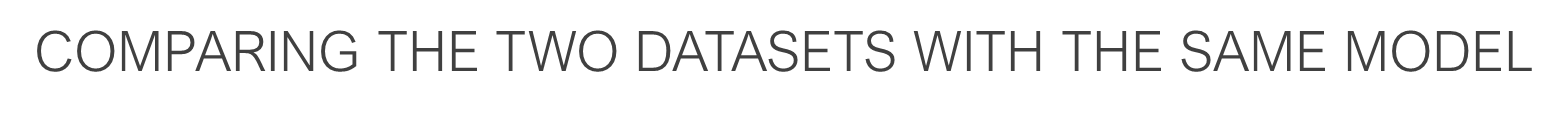

Having only tested accuracies and 10-fold cross validation of a logistic regression with 100 iterations, we have few metrics to compare. For a more thorough comparision; precision, recall and the f1 score could also be included.

Through the two tests, we can see that the MNIST dataset has a much higher fit score of over 92% and an accuracy averaging 0.915 as compared to the Kuzushiji-MNIST dataset’s fit score of 69% and accuracy averaging 0.82.